In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


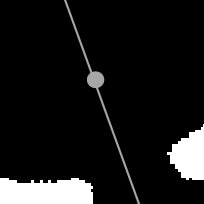

[0 0 0]


In [ ]:
img = cv2.imread('/image.jpg')
cv2_imshow(img)
print(img[0,0])

In [ ]:
# zmniejszanie przy pomocy jadra konwolucji
def resize_image_min(image, scale_factor):
    height, width = image.shape[:2]


    new_height = int(height - kernel_size + 1)
    new_width = int(width - kernel_size + 1)

    # tworzymy nowy pusty obraz z wyskalowanymi parametrami
    resized_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
      for j in range(new_width):
        resized_image[i, j] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * scale_factor)



    return resized_image

img = cv2.imread('/image.jpg')
if img is None:
    raise ValueError("Error loading image.")
scale_factor = 1/2
# obraz zmniejszy się w zależności od wielkości jądra jakie ustawimy
kernel_size = 10
resized_image_min = resize_image_min(img, scale_factor)

In [ ]:
cv2.imwrite('resized_image.jpg', resized_image_min)

True

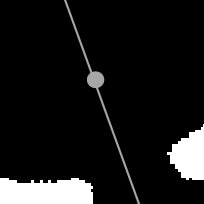

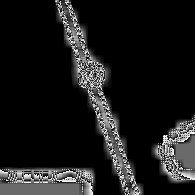

In [ ]:
cv2_imshow(img)
cv2_imshow(resized_image_min)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def resize_image_max(image, scale_factor):
    height, width = image.shape[:2]

    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # tworzymy nowy pusty obraz z wyskalowanymi parametrami
    enlarged_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            # współrzędne w oryginalnym obrazie, przekształcone przy użyciu skali
            original_i = int(i / scale_factor)
            original_j = int(j / scale_factor)

            # interpolacja punktów
            enlarged_image[i, j] = image[original_i, original_j]

    return enlarged_image

img = cv2.imread('/image.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Error loading image.")

# Skalowanie obrazu o współczynnik 2 (powiększenie dwukrotne)
scale_factor = 2
resized_image_max = resize_image_max(img, scale_factor)

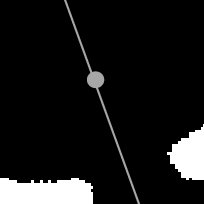

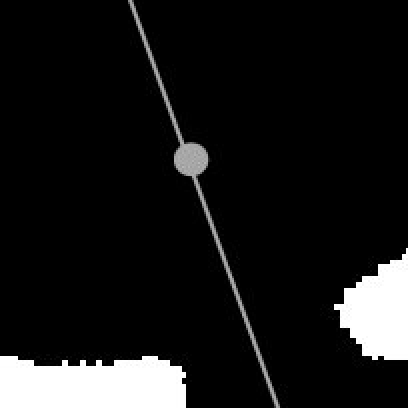

In [ ]:
cv2_imshow(img)
cv2_imshow(resized_image_max)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def mse(image1, image2):
    # Dopasowanie rozmiarów obrazów
    min_height = min(image1.shape[0], image2.shape[0])
    min_width = min(image1.shape[1], image2.shape[1])
    image1 = image1[:min_height, :min_width]
    image2 = image2[:min_height, :min_width]

    return np.sum((image1 - image2)**2) / float(image1.size)

In [ ]:
mse_down = mse(img, resized_image_min)
mse_up = mse(img, resized_image_max)
print(mse_down)
print(mse_up)

30.875713346482577
9.892325067281815
